# Drawing Toy: a simple example of using AgentDesk

This tutorial shows you the basic capabilities of AgentDesk: running a VM, opening a browser, using the mouse inside the VM and making screenshots. We also show how to execute Desktop actions by passing JSON descriptions of operations to it.

Prerequisites:

* [qemu](https://www.qemu.org/)
* [Docker Desktop](https://www.docker.com/products/docker-desktop)
* `pip install agentdesk`

### Running a VM

Let's start from running a VM. When you execute this cell, the following should happen:

* The docker image with an `Agentd` daemon will be downloaded.
* The virtual machine will be started via `qemu`.
* A docker container with UI will be started via `Docker Desktop`.
* Your default browser will open the UI with a stream from the VM.

For the first time of running AgentDesk, this may take some time. Please be patient!

*Warning*: all operations with desktop are asynchronous and take some time, depending on your local machine performance. If you run this notebook without pauses, you'll likely not see the intended results. Please run cell one by one and observe the changes in the VM browser.

In [8]:
from agentdesk import Desktop

In [3]:

# Create a local desktop
desktop = Desktop.local()
# Launch the desktop UI
desktop.view(background=True)


connecting to local sqlite db ./data/agentdesk.db
using ssh key in ~/.ssh/id_rsa.pub
waiting for desktop to be ready...
calling agentd...
agentd response:  <Response [200]>

successfully created desktop 'confident-torvalds'
vm doesn't require proxy
connected to desktop via agentd
found running UI container


You can see that the VM is fully operational: you can use your mouse and keyboard there, if you want, and get the updates in real time. However, this is not the main purpose of the AgentDesk tool.

### Screenshot utility function

Before moving on, let's define an utility function to visualize the screenshots.

In [4]:
import base64
from io import BytesIO
from typing import Union

from PIL import Image

def visualize_b64_img(b64_str: str) -> Union[Image.Image, None]:
    try:
        img_data = base64.b64decode(b64_str)
        img_io = BytesIO(img_data)
        img = Image.open(img_io)

        return img
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

### Direct manipulation with Desktop

For the purpose of this tutorial, we take a simple drawing toy at https://mondrianandme.com/. This is a light-weight website where one can click on a canvas to generate images in Mondrian style. 



In [45]:
desktop.open_url("https://mondrianandme.com/")

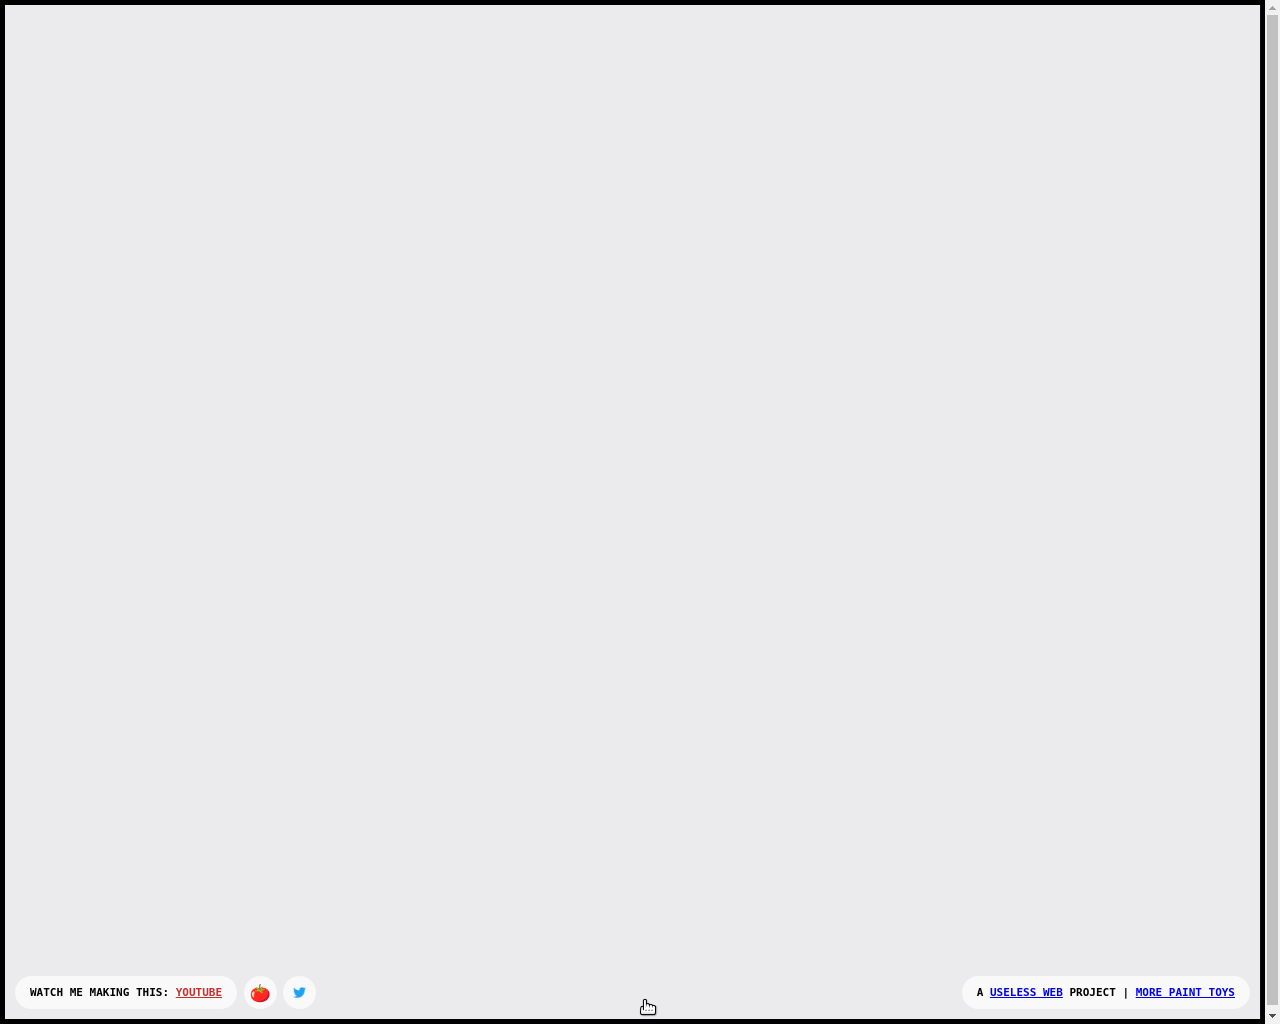

In [59]:
visualize_b64_img(desktop.take_screenshot())

In [60]:
desktop.click(x=150, y=100)

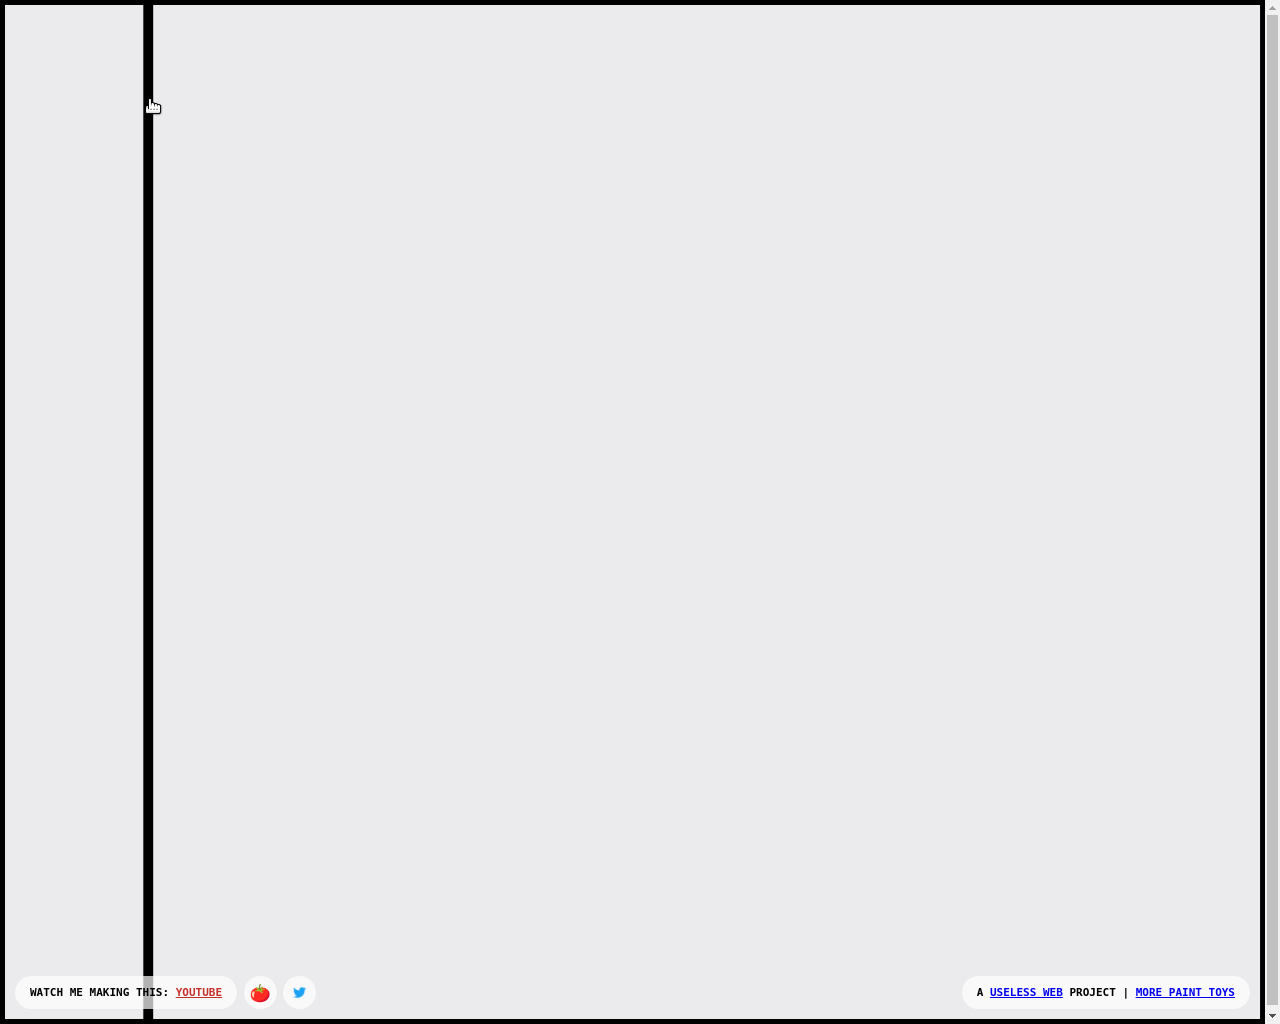

In [61]:
visualize_b64_img(desktop.take_screenshot())

### Using JSON schema to run Desktop actions

In [62]:
actions = desktop.json_schema()
actions

[{'name': 'click',
  'parameters': {'type': 'object',
   'properties': {'button': {'type': 'string',
     'description': 'Button to click. Defaults to "left".'},
    'x': {'anyOf': [{'type': 'integer'}, {'type': 'null'}],
     'description': 'X coordinate to move to, if not provided it will click on current location. Defaults to None.'},
    'y': {'anyOf': [{'type': 'integer'}, {'type': 'null'}],
     'description': 'Y coordinate to move to, if not provided it will click on current location. Defaults to None.'}},
   'required': []},
  'description': 'Click mouse button'},
 {'name': 'double_click',
  'parameters': {'type': 'object', 'properties': {}, 'required': []},
  'description': 'Double click the mouse'},
 {'name': 'drag_mouse',
  'parameters': {'type': 'object',
   'properties': {'x': {'type': 'integer', 'description': 'x coordinate'},
    'y': {'type': 'integer', 'description': 'y coordinate'}},
   'required': ['x', 'y']},
  'description': 'Drag the mouse'},
 {'name': 'move_mouse

In [63]:
def next_click_json(n):
    return {"tool": "click", "parameters": {"x": n * 150, "y": n * 100}}


In [64]:
action = desktop.find_action("click")

for i in range(2, 10):
    json_click = next_click_json(i)
    desktop.use(action, **json_click["parameters"])


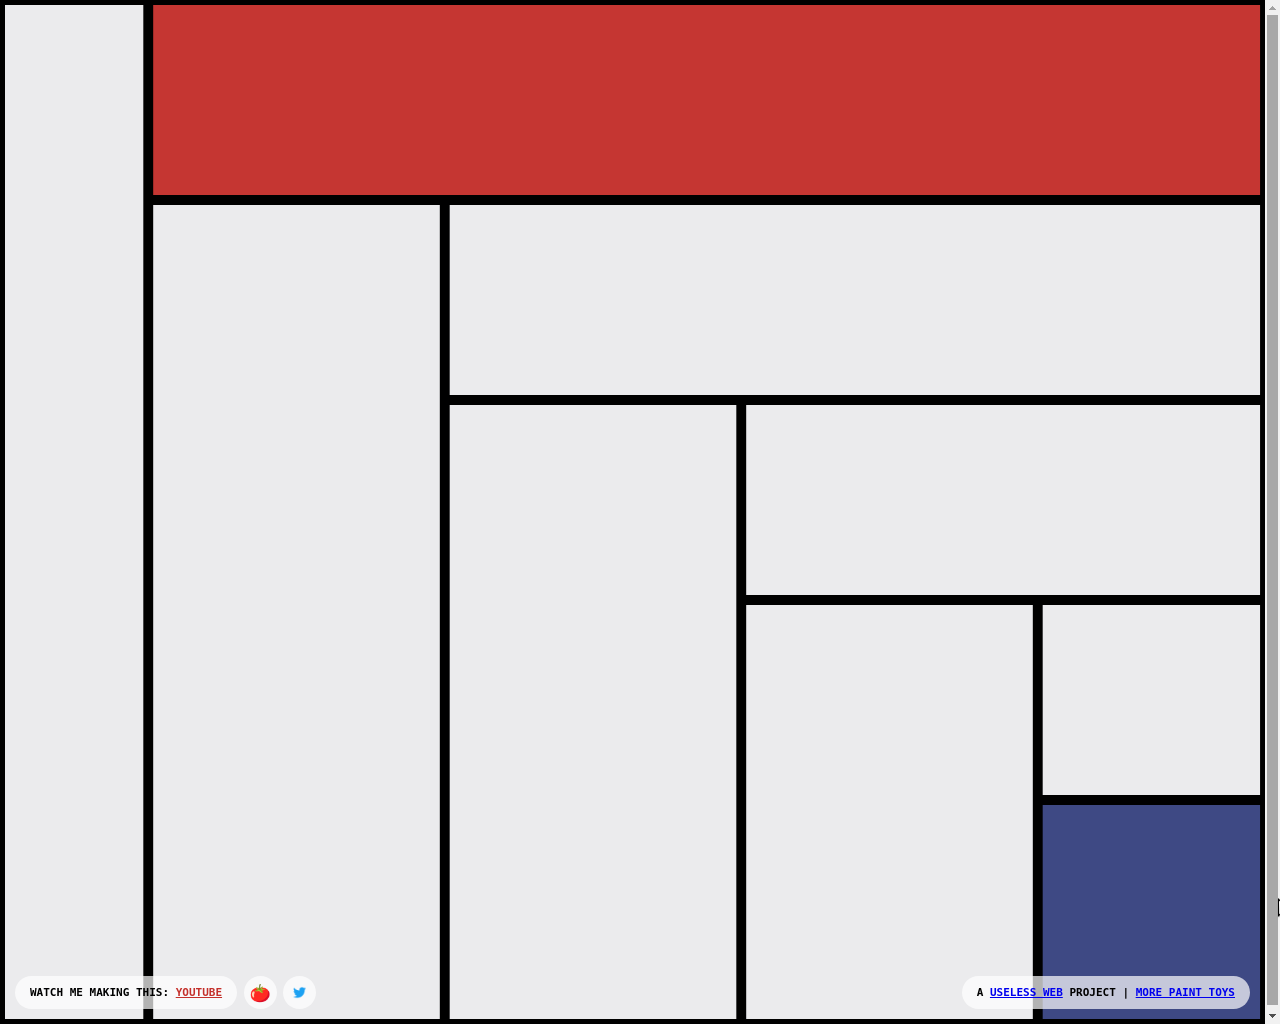

In [65]:
visualize_b64_img(desktop.take_screenshot())

### What's next?

* To see a basic example on how to use Desktop as a Tool for LLM, see the code in `agentdesk/examples/gpt4v`.
* To see a more complex use-case, check out [SurfDino](https://github.com/agentsea/surfdino) – our GUI surfing agent.
* Visit the [library reference](https://agentsea.github.io/agentdesk/) for more information.

